(sec-Chauvenet)=
# Criterio de Chauvenet[^pronuncia]

[^pronuncia]: [Para la pronunciación correcta de Chauvenet](https://es.forvo.com/word/chauvenet/).

Es posible que al realizar mediciones de una cantidad física, que fluctua de forma aleatoria, se encuentren valores *sesgados* que aparentemente se alejan bastante del valor esperado, y pueden influir de forma apreciable en el valor esperado y su incertidumbre. Por ejemplo, en la {numref}`fig-sonido-afeitadora`, el segundo y último dato de intensidad de sonido se aleja de forma importante del valor esperado, y parecen haber incrementado la incertidumbre del resultado de forma importante: visualmente uno esperaría una incertidumbre inferior a $1\,\text{dB}$, pero se obtuvo una incertidumbre de $3\,\text{dB}$. La pregunta que surge es ¿*puedo quitar estos valores de mis datos para que no modifiquen mi resultado*? Como se parte de la premisa de que los datos *sesgados* corresponden a la influencia de un evento ajeno al fenómeno estudiado, la directriz a seguir es *volver a tomar los datos experimentales*.

```{figure} imagenes/sonido-afeitadora.svg
:name: fig-sonido-afeitadora

Intensidad del sonido de una máquina de afeitar, en decibeles. El valor más probable de intensidad de sonido es $(73\pm 3)\,\text{dB}$.
```

Pero habrá ocasiones en que no es posible volver a realizar el experimento. Para estos casos se usa el *criterio de Chauvenet*. Partiendo de la premisa de que los datos siguen una distribución normal, este criterio analiza que tan probable es obtener el valor *sesgado* para el número de datos medidos. El procedimiento a seguir es el siguiente:

1. Elegir el número de desviaciones $n$ a partir del cuál consideramos los datos como sesgados. En consonancia con lo presentado en la {numref}`tabla-comparacionxy`, se recomienda tomar $n = 2.5$.
2. Determinar el valor esperado $\bar x$ y la desviación estándar $s$ de la distribución de datos.
3. Determinar los $x_i$ valores que cumplen la condición de *valor sesgado*: $|x_i - \bar x| > ns$.
4. Para cada $x_i$ calcular la probabilidad de medir un valor $x$ que se encuentre igual o más alejado del valor esperado que $x_i$: $ P_i = 1- P(\bar x - x_i \leq x \leq \bar x + x_i) $.
5. Para cada $x_i$ calcular el número de veces $N_i$ que se espera encontrar un valor como este en un experimento con $N$ datos: $ N_i = N\times P_i $.
6. Si $N_i < 0.5$, el valor $x_i$ se descarta.
7. Se vuelve a determinar el valor esperado $\bar x$ y la desviación estándar $s$ con los datos restantes.

Para el ejemplo de la {numref}`fig-sonido-afeitadora` se tiene:

1. $n = 2.5$.
2. $\bar x = 73\,\text{dB}$ y $s = 3\,\text{dB}$.
3. Los valores que cumplen son $57.88\,\text{dB}$ en $t_1 = 28.89\,\text{s}$, y $65.12\,\text{dB}$ en $t_2 = 33.15\,\text{s}$
4. Probabilidades: $P_{t_1} = 1.8\times 10^{-8}$ y $P_{t_2} = 0.0035$.
5. $N_i$: $N_{t_1} = 7.9\times 10^{-9}$ y $N_{t_2} = 0.16$.
6. Ambos valores son menores a $0.5$, por lo que ambos se descartan.
7. $\bar x = 73.4\,\text{dB}$ y $s = 0.4\,\text{dB}$.

En la {numref}`fig-sonido-chauvenet` se pueden observar los datos luego de descartar los valores *sesgados*. Es claro como ambos valores estaban aumentando de forma considerable la incertidumbre. Igualmente, estaban desplazando el valor más probable de intensidad de sonido hacia un valor inferior al finalmente reportado[^despla].

[^despla]: El valor obtenido antes de definir el número de cifras significativas fue $72.89\,\text{dB}$.

```{figure} imagenes/sonido-chauvenet.svg
:name: fig-sonido-chauvenet

Intensidad del sonido de una máquina de afeitar, en decibeles. Se eliminaron los valores *sesgados* $57.88\,\text{dB}$ en $t_1 = 28.89\,\text{s}$ y $65.12\,\text{dB}$ en $t_2 = 33.15\,\text{s}$. El valor más probable de intensidad de sonido es $(73.4\pm 0.4)\,\text{dB}$.
```

A continuación se comparte un código ejemplo para determinar los valores sesgados:

El valor 57.88 fue eliminado porque valC = 7.859630219943293e-07
El valor 65.12 fue eliminado porque valC = 0.15610182593501906


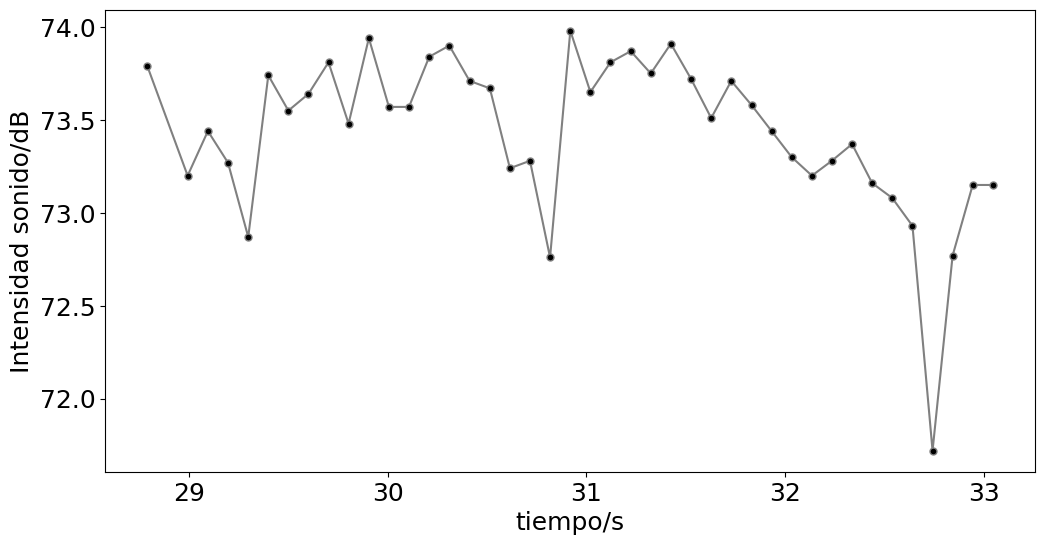

media = 73.43595238095239 dB y desv = 0.4255444691663788 dB


In [1]:
import numpy as np
###############################
criterio = 2.5             # Criterio para considerar un valor como sesgado
datat = np.array([28.791, 28.893, 28.994, 29.096, 29.197, 29.299, 29.4  , 29.501,
       29.602, 29.703, 29.804, 29.906, 30.007, 30.108, 30.21 , 30.311,
       30.413, 30.515, 30.616, 30.717, 30.818, 30.92 , 31.021, 31.122,
       31.224, 31.325, 31.426, 31.528, 31.629, 31.73 , 31.832, 31.933,
       32.034, 32.136, 32.236, 32.338, 32.439, 32.54 , 32.642, 32.743,
       32.844, 32.945, 33.046, 33.147]) # Valores ejemplo: intensidad sonido
dataB = np.array([73.79, 57.88, 73.2 , 73.44, 73.27, 72.87, 73.74, 73.55, 73.64,
       73.81, 73.48, 73.94, 73.57, 73.57, 73.84, 73.9 , 73.71, 73.67,
       73.24, 73.28, 72.76, 73.98, 73.65, 73.81, 73.87, 73.75, 73.91,
       73.72, 73.51, 73.71, 73.58, 73.44, 73.3 , 73.2 , 73.28, 73.37,
       73.16, 73.08, 72.93, 71.72, 72.77, 73.15, 73.15, 65.12])    # Valores ejemplo: tiempo
###############################

import pylab as plt
plt.rcParams.update({'font.size':18})
from scipy.stats import norm

media = np.mean(dataB)
desv = np.std(dataB,ddof=1)
disper = abs(dataB-media)
ubica = []
valor = []
valC = []
for ii in range(len(disper)):
    if(np.max(disper[ii])>criterio*desv):
        ubica.append(ii)
        valor.append(dataB[ii])
        prob = 2*norm.sf(media + abs(dataB[ii]-media),loc=media,scale=desv)
        valC.append(len(dataB)*prob)

ubica = np.asarray(ubica)
for ii in range(len(valC)):
    if(valC[ii] < 0.5):
        dataB = np.delete(dataB,ubica[ii])
        datat = np.delete(datat,ubica[ii])
        ubica = ubica - 1
        print('El valor {} fue eliminado porque valC = {}'.format(valor[ii],valC[ii]))

media = np.mean(dataB)
desv = np.std(dataB,ddof=1)
fig,ax = plt.subplots(1,figsize=(12,6))
ax.plot(datat,dataB,color='gray',marker='.',ms='10',markerfacecolor='k')
ax.set_xlabel('tiempo/s')
ax.set_ylabel('Intensidad sonido/dB')
#plt.savefig('imagenes/sonido-chauvenet.svg')
plt.show()    

# valor esperado y desviación estándar
media = np.mean(dataB)
desv = np.std(dataB,ddof=1)
print('media = {} dB y desv = {} dB'.format(media,desv))

```{note}
La elección del valor $0.5$ como criterio para decidir si un valor *sesgado* se descarta o no, es arbitrario. No obstante, se puede justificar que al ser el número de eventos posibles un número entero, si nuestro resultado está entre $0.5$ y $0.9$, hemos convenido aproximarlo a la unidad para que sea un valor entero. Luego, estadísticamente era de esperarse que el valor sesgado apareciera en una medición, por lo que no se puede descartar.
```

```{warning}
Para poder aplicar el criterio de Chauvenet hay que estar seguros que la distribución de los datos es normal. Dado que la aplicación del criterio modifica el valor esperado, y en especial la desviación estándar, **sólo se recomienda aplicarlo una sola vez**, sin importar que con el nuevo valor esperado y desviación estándar nuevos valores cumplan el criterio.
```

```{seealso}

Para leer más sobre el criterio de Chauvenet consultar la sección 3.3.2 de {cite}`Hughes2010`, la sección 6.2 de {cite}`Taylor1996`, o la página 56 de {cite}`Bevington`.

```